In [ ]:
!pip install osmnx


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 95.5/95.5 kB 8.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 57.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.4/16.4 MB 89.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 113.2 MB/s eta 0:00:00


In [ ]:
import osmnx as ox
import matplotlib.pyplot as plt

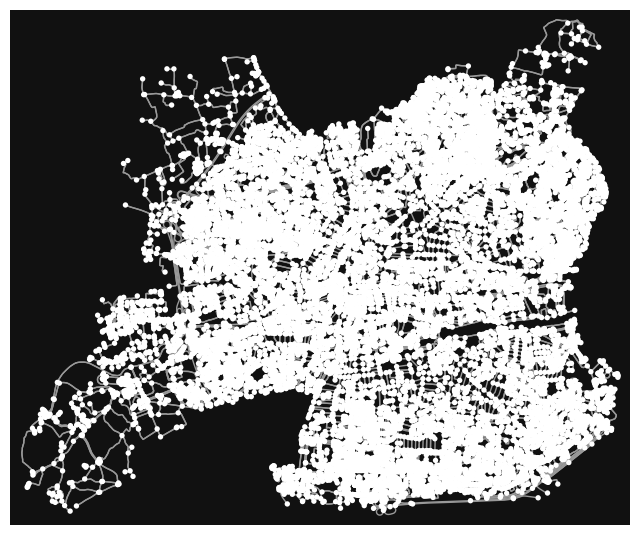

In [ ]:
# Specify the name that is used to seach for the data
place_name = "Rennes, France"
# Fetch OSM street network from the location
graph = ox.graph_from_place(place_name)
# Plot the streets
fig, ax = ox.plot_graph(graph)

In [ ]:
# Retrieve nodes and edges
nodes, edges = ox.graph_to_gdfs(graph)

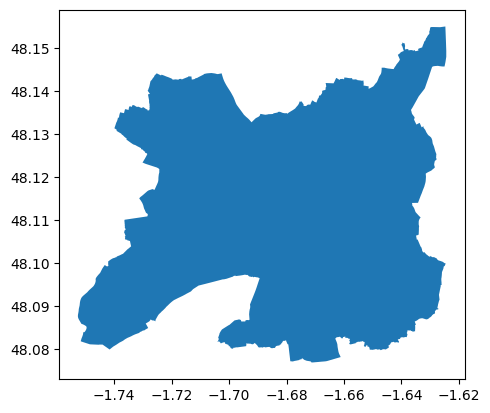

In [ ]:
# Get place boundary related to the place name as a geodataframe
area = ox.geocode_to_gdf(place_name)
area.plot();

In [ ]:
# List key-value pairs for tags
tags = {"building": True}
buildings = ox.geometries_from_place(place_name, tags)

NameError: ignored

In [ ]:
buildings

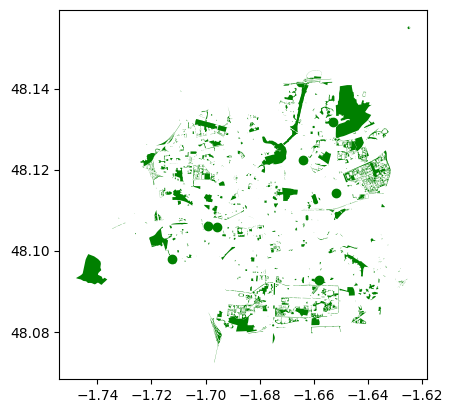

In [ ]:
# List key-value pairs for tags
tags = {"leisure": "park", "landuse": "grass"}
# Get the data
parks = ox.geometries_from_place(place_name, tags)
parks.plot(color="green");

In [ ]:
parks.head(20)

source  \
element_type osmid                
node         3775314806     NaN   
             4346614844     NaN   
             4640021239     NaN   
             9332582527     NaN   
             9647910872     NaN   
             10881019669    NaN   
             10881080292    NaN   
way          4980480        NaN   
             4980781        NaN   
             8010374        NaN   
             8167755        NaN   
             17035273       NaN   
             17049854       NaN   
             22869862       NaN   
             22943171       NaN   
             23255048       NaN   
             23589920       NaN   
             23639148       NaN   
             24771741       NaN   
             24797199       NaN   

                                                                   geometry  \
element_type osmid                                                            
node         3775314806                           POINT (-1.65168 48.11412)   
             4346614844                           POINT (-1.69585 48.10579)   
             4640021239                           POINT (-1.71229 48.09792)   
             9332582527                           POINT (-1.65792 48.09278)   
             9647910872                           POINT (-1.66401 48.12228)   
             10881019669                          POINT (-1.69923 48.10603)   
             10881080292                          POINT (-1.65308 48.13172)   
way          4980480      POLYGON ((-1.64153 48.12656, -1.64152 48.12662...   
             4980781      POLYGON ((-1.65455 48.12141, -1.65429 48.12209...   
             8010374      POLYGON ((-1.70977 48.10729, -1.70975 48.10726...   
             8167755      POLYGON ((-1.70895 48.10652, -1.70895 48.10647...   
             17035273     POLYGON ((-1.64259 48.09367, -1.64189 48.09363...   
             17049854     POLYGON ((-1.64757 48.09102, -1.64575 48.09098...   
             22869862     POLYGON ((-1.66204 48.14074, -1.66237 48.14083...   
             22943171     POLYGON ((-1.68263 48.08414, -1.68261 48.08447...   
             23255048     POLYGON ((-1.63873 48.13591, -1.63960 48.13554...   
             23589920     POLYGON ((-1.64554 48.09404, -1.64552 48.09397...   
             23639148     POLYGON ((-1.65713 48.09285, -1.65632 48.09264...   
             24771741     POLYGON ((-1.68089 48.10313, -1.68034 48.10320...   
             24797199     POLYGON ((-1.68195 48.09803, -1.68195 48.09815...   

                         barrier access bicycle foot addr:city  \
element_type osmid                                               
node         3775314806      NaN    NaN     NaN  NaN       NaN   
             4346614844      NaN    NaN     NaN  NaN       NaN   
             4640021239      NaN    NaN     NaN  NaN       NaN   
             9332582527      NaN    NaN     NaN  NaN       NaN   
             9647910872      NaN    NaN     NaN  NaN    Rennes   
             10881019669     NaN    NaN     NaN  NaN    Rennes   
             10881080292     NaN    NaN     NaN  NaN    Rennes   
way          4980480         NaN    NaN     NaN  NaN       NaN   
             4980781         NaN    NaN     NaN  NaN       NaN   
             8010374         NaN    NaN     NaN  NaN       NaN   
             8167755         NaN    NaN     NaN  NaN       NaN   
             17035273        NaN    NaN     NaN  NaN       NaN   
             17049854        NaN    NaN     NaN  NaN       NaN   
             22869862        NaN    NaN     NaN  NaN       NaN   
             22943171        NaN    NaN     NaN  NaN       NaN   
             23255048        NaN    NaN     NaN  NaN       NaN   
             23589920        NaN    NaN     NaN  NaN       NaN   
             23639148        NaN    NaN     NaN  NaN       NaN   
             24771741        NaN    NaN     NaN  NaN       NaN   
             24797199        NaN    NaN     NaN  NaN       NaN   

                         addr:housenumber             addr:str

In [ ]:
coordinates = []
for _, park in parks.iterrows():
    geometry = park['geometry']
    if hasattr(geometry, 'geom_type'):
        if geometry.geom_type == 'Polygon':
            coordinates.append(list(geometry.exterior.coords))
        elif geometry.geom_type == 'MultiPolygon':
            for polygon in geometry.geoms:
                coordinates.append(list(polygon.exterior.coords))

In [ ]:
coordinates

[[(-1.6415274, 48.1265638),
  (-1.6415183, 48.1266191),
  (-1.6415179, 48.1266748),
  (-1.6415318, 48.126726),
  (-1.6415558, 48.1267787),
  (-1.641684, 48.1270009),
  (-1.6417289, 48.127085),
  (-1.6420045, 48.1275805),
  (-1.6421634, 48.1278557),
  (-1.6423254, 48.1281321),
  (-1.6435689, 48.1278554),
  (-1.6443245, 48.1276968),
  (-1.6447384, 48.1275784),
  (-1.6445313, 48.1270346),
  (-1.6449563, 48.1268768),
  (-1.6448861, 48.1265628),
  (-1.6448687, 48.126433),
  (-1.6446182, 48.1261499),
  (-1.6446769, 48.1260563),
  (-1.644498, 48.1260091),
  (-1.6441819, 48.125637),
  (-1.6446224, 48.1250371),
  (-1.6444978, 48.1249345),
  (-1.643987, 48.1245611),
  (-1.6439508, 48.1245554),
  (-1.6439219, 48.1245554),
  (-1.6438864, 48.1245568),
  (-1.6438559, 48.1245619),
  (-1.643563, 48.1247352),
  (-1.6426469, 48.1252772),
  (-1.6424903, 48.1253866),
  (-1.6424182, 48.1254477),
  (-1.6423083, 48.1255507),
  (-1.6422264, 48.1256362),
  (-1.6418603, 48.1260936),
  (-1.6415274, 48.1265638)],

In [ ]:
!pip install folium


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# park_locations = [
#   (-1.6415274, 48.1265638),
#   (-1.6415183, 48.1266191),
#   (-1.6415179, 48.1266748),
#   (-1.6415318, 48.126726),
#   (-1.6415558, 48.1267787),
#   (-1.641684, 48.1270009),
#   (-1.6417289, 48.127085),
#   (-1.6420045, 48.1275805),
#   (-1.6421634, 48.1278557),
#   (-1.6423254, 48.1281321),
#   (-1.6435689, 48.1278554),
#   (-1.6443245, 48.1276968),
#   (-1.6447384, 48.1275784),
#   (-1.6445313, 48.1270346),
#   (-1.6449563, 48.1268768),
#   (-1.6448861, 48.1265628),
#   (-1.6448687, 48.126433),
#   (-1.6446182, 48.1261499),
#   (-1.6446769, 48.1260563),
#   (-1.644498, 48.1260091)
#   ]

In [ ]:
import folium
import numpy as np
from folium.plugins import HeatMap

# Create a Folium map centered on Rennes
m = folium.Map(location=[48.117, -1.677], zoom_start=13)

# Generate a list of park locations
# park_locations = [[coord[0], coord[1]] for coord in coordinates]
#park_locations = [[coord[0], coord[1]] for coords in coordinates for coord in coords]
#park_locations = [coord for sublist in coordinates for coord in sublist]
park_locations = [[coord[1], coord[0]] for coords in coordinates for coord in coords]



# Add the park locations to the heatmap layer
HeatMap(park_locations, radius=15).add_to(m)

# Display the map
m


In [ ]:
park_locations

[[-1.6415274, 48.1265638],
 [-1.6415183, 48.1266191],
 [-1.6415179, 48.1266748],
 [-1.6415318, 48.126726],
 [-1.6415558, 48.1267787],
 [-1.641684, 48.1270009],
 [-1.6417289, 48.127085],
 [-1.6420045, 48.1275805],
 [-1.6421634, 48.1278557],
 [-1.6423254, 48.1281321],
 [-1.6435689, 48.1278554],
 [-1.6443245, 48.1276968],
 [-1.6447384, 48.1275784],
 [-1.6445313, 48.1270346],
 [-1.6449563, 48.1268768],
 [-1.6448861, 48.1265628],
 [-1.6448687, 48.126433],
 [-1.6446182, 48.1261499],
 [-1.6446769, 48.1260563],
 [-1.644498, 48.1260091],
 [-1.6441819, 48.125637],
 [-1.6446224, 48.1250371],
 [-1.6444978, 48.1249345],
 [-1.643987, 48.1245611],
 [-1.6439508, 48.1245554],
 [-1.6439219, 48.1245554],
 [-1.6438864, 48.1245568],
 [-1.6438559, 48.1245619],
 [-1.643563, 48.1247352],
 [-1.6426469, 48.1252772],
 [-1.6424903, 48.1253866],
 [-1.6424182, 48.1254477],
 [-1.6423083, 48.1255507],
 [-1.6422264, 48.1256362],
 [-1.6418603, 48.1260936],
 [-1.6415274, 48.1265638],
 [-1.6545517, 48.121412],
 [-1.65429

In [ ]:
import folium

# Create the map
map_center = [48.1173, -1.6778]  # Latitude and longitude of Rennes, France
zoom_level = 5  # Adjust the zoom level as needed
map_object = folium.Map(location=map_center, zoom_start=zoom_level)

# Flatten the coordinates
flat_coordinates = [coord for coords in coordinates for coord in coords]
# flat_coordinates = [
#     (48.117266, -1.677792),
#     (48.105628, -1.674385),
#     (48.108723, -1.682343),
#     (48.119487, -1.675999),
#     (48.114459, -1.663335)
# ]

# Add pins for all coordinates
for coord in flat_coordinates:
    folium.Marker(location=coord, icon=folium.Icon(color='green')).add_to(map_object)
    #folium.Polygon(locations=coord, color='black', fill=True, fill_color='black').add_to(map_object)


# Display the map
map_object

from IPython.display import display
display(map_object)


In [ ]:
map_object

In [ ]:
fig, ax = plt.subplots(figsize=(12,8))
# Plot the footprint
area.plot(ax=ax, facecolor="black", zorder=0)
# Plot street edges
edges.plot(ax=ax, linewidth=0.5, edgecolor="dimgray", zorder=1)
# Plot buildings
buildings.plot(ax=ax, facecolor="blue", alpha=0.7, zorder=2)
# Plot parks
parks.plot(ax=ax, color="green", alpha=0.7, markersize=10, zorder=3)
plt.tight_layout()
plt.axis("off")